# Data standardization and reshaping

**Loading data**

In [1]:
## Loading and viewing the dataset

import numpy as np
import pandas as pd
import math
from random import gauss

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## Data preprocessing

df=pd.read_csv("drive/MyDrive/data.csv").dropna()
df.drop(df.columns[0],axis=1,inplace=True)
df_modified_kNN = df.copy()

In [4]:
df.shape

(60000, 785)

In [5]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,pullover,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,shirt,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,tee,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,dress,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
## Encoding the labels for easier compatibility with ANN/CNN

obj_df = df['label']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(obj_df)
aux=le.transform(obj_df)
df.insert(0,'label_encoded',aux) ## Changing the label index to 0

In [7]:
df.head()

,label_encoded,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,5,pullover,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,boot,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,shirt,0,0,0,0,0,0,0,5,...,0,0,0,30,43,0,0,0,0,0
3,9,tee,0,0,0,1,2,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,dress,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


In [9]:
from sklearn.model_selection import train_test_split

**Train-test split**

In [10]:
## Creating the predictor and response variables
## y is of shape (4715,)
## X is of shape (4715, 784)

y=np.asarray(df['label_encoded'])
X=np.asarray(df.iloc[:,2:])

In [11]:
## First 100 label encoded values of y

print(y[:100])

[5 1 6 9 3 2 2 8 2 0 9 0 1 9 5 5 1 3 3 3 0 7 2 2 9 2 2 0 7 4 8 9 8 3 5 7 3
 2 5 4 6 9 1 6 9 8 6 7 7 5 8 5 5 2 4 2 1 0 3 2 8 8 6 3 8 0 8 1 0 4 5 0 4 3
 6 0 3 2 5 8 9 5 6 0 4 5 7 6 6 2 6 8 9 4 7 3 8 0 2 3]


In [12]:
## Minor detail: changing y shape from (475,) to (475,1)

y=y.reshape(y.shape[0],1)

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [14]:
train_images_ar, test_images_ar, train_labels_ar, test_labels_ar = train_test_split(X, y, test_size=0.33, random_state=42)
# I change the name a bit, so I can use the array type in my code. (Juan Yi)

**Data standardization**

In [15]:
# Add in a normalization 
def standardize_dataset(X):
  '''
  X: numpy array
  RETURN
  X_std: numpy array
  '''
  X_std = (X - X.mean())/X.std()  # since we only care about the shape, not the 'brightness' ('strength putted when writing the word'?) of the picture.
  return X_std

train_images_std = standardize_dataset(train_images_ar)
test_images_std = standardize_dataset(test_images_ar)

In [16]:
# reshaping the data to fit the model

train_images=train_images_std.reshape(train_images_std.shape[0],28,28)
test_images=test_images_std.reshape(test_images_std.shape[0],28,28)

In [17]:
print(train_images.shape,test_images.shape,train_labels_ar.shape,test_labels_ar.shape)

(40200, 28, 28) (19800, 28, 28) (40200, 1) (19800, 1)


# ANN (including epoch optimization)

In [18]:
# Model setup

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
# model compilation

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
# Setting up timer

import time
def exec_time(start, end):
   diff_time = end - start
   return diff_time

In [22]:
history_ann=model.fit(train_images, train_labels_ar, epochs=10,validation_data=(test_images,test_labels_ar))

Epoch 1/10
1257/1257 [==============================] - 7s 3ms/step - loss: 0.4872 - accuracy: 0.8243 - val_loss: 0.3961 - val_accuracy: 0.8548
Epoch 2/10
1257/1257 [==============================] - 4s 3ms/step - loss: 0.3704 - accuracy: 0.8637 - val_loss: 0.4246 - val_accuracy: 0.8476
Epoch 3/10
1257/1257 [==============================] - 4s 3ms/step - loss: 0.3301 - accuracy: 0.8768 - val_loss: 0.3736 - val_accuracy: 0.8669
Epoch 4/10
1257/1257 [==============================] - 4s 3ms/step - loss: 0.3087 - accuracy: 0.8860 - val_loss: 0.3539 - val_accuracy: 0.8752
Epoch 5/10
1257/1257 [==============================] - 4s 3ms/step - loss: 0.2860 - accuracy: 0.8936 - val_loss: 0.3577 - val_accuracy: 0.8714
Epoch 6/10
1257/1257 [==============================] - 4s 4ms/step - loss: 0.2723 - accuracy: 0.8983 - val_loss: 0.3524 - val_accuracy: 0.8752
Epoch 7/10
1257/1257 [==============================] - 4s 3ms/step - loss: 0.2580 - accuracy: 0.9039 - val_loss: 0.3540 - val_accuracy:

In [23]:
# ANN evaluation

test_loss, test_acc = model.evaluate(test_images,  test_labels_ar, verbose=2)

print('\nTest accuracy:', test_acc)

619/619 - 1s - loss: 0.3500 - accuracy: 0.8850 - 1s/epoch - 2ms/step

Test accuracy: 0.8849999904632568


Plotting the validation accuracy to epochs

In [24]:
import matplotlib as pyplot
def plotHistory(history):
  history_data = pd.DataFrame(history.history)
  test_data_hist = pd.DataFrame(history_data[['val_loss','val_accuracy']])

  # History for accuracy
  test_data_hist.plot(figsize=(8,5))
  plt.grid(True)
  plt.gca().set_ylim(0,1)

  # END CODE HERE
  plt.show()

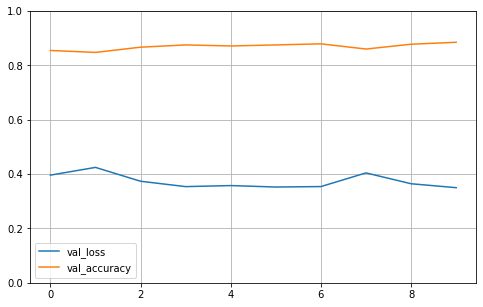

In [25]:
plotHistory(history_ann)

In [26]:
## This gives us the probability of each class variable
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [27]:
predictions = probability_model.predict(test_images)

619/619 [==============================] - 1s 1ms/step


In [28]:
predictions[0]

array([2.2430627e-06, 2.4382758e-05, 6.7068690e-08, 1.9301438e-10,
       3.7101923e-08, 5.1418492e-10, 5.1353561e-12, 9.9993622e-01,
       3.7115708e-05, 7.6913987e-12], dtype=float32)

In [29]:
## This predicts that the pixels in the 1st row is most likely to represent class 8

maxClass=np.argmax(predictions[0])
maxClass

7

In [30]:
## Decoding the meaning of 8

le.inverse_transform([np.argmax(predictions[0])])

array(['shoes'], dtype=object)

In [31]:
le.inverse_transform(test_labels_ar[0])

array(['shoes'], dtype=object)

# CNN (including epoch optimization)

In [32]:
train_labels_ar.shape

(40200, 1)

In [33]:
# one-hot encoding
train_labels_onehot = tf.one_hot(train_labels_ar, depth = 10)
test_labels_onehot = tf.one_hot(test_labels_ar, depth = 10)

In [34]:
train_labels_onehot=tf.reshape(train_labels_onehot,[train_labels_onehot.shape[0],10])
test_labels_onehot=tf.reshape(test_labels_onehot,[test_labels_onehot.shape[0],10])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


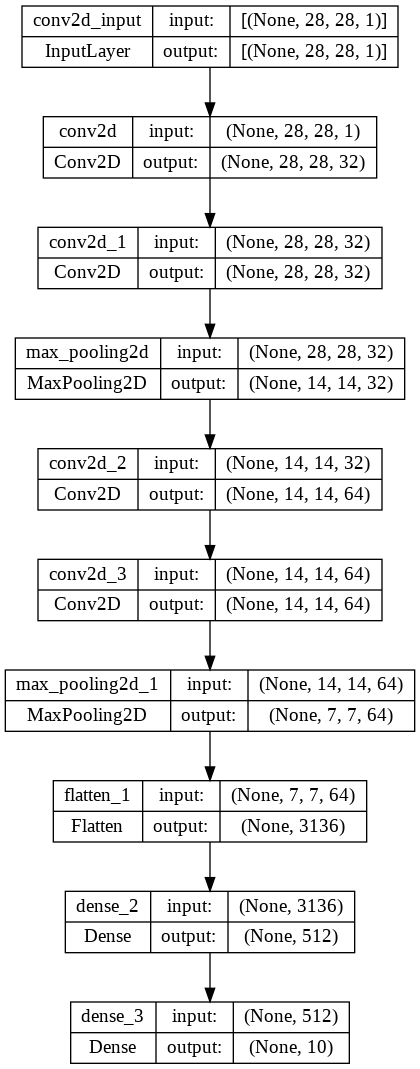

In [35]:
model_cnn = tf.keras.models.Sequential()

## first CONV => RELU => CONV => RELU => POOL layer set ##
model_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation = 'relu', input_shape = (28,28,1)))
model_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation = 'relu'))
model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


## second CONV => RELU => CONV => RELU => POOL layer set ##
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation = 'relu'))
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation = 'relu'))
model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


## first (and only) set of FC => RELU layers ##
model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(512, activation = 'relu'))
model_cnn.add(tf.keras.layers.Dense(10, activation = 'softmax'))

# copy from https://pyimagesearch.com/2019/02/11/fashion-mnist-with-keras-and-deep-learning/

NUM_EPOCHS = 10
INIT_LR = 1e-2
BS = 32

opt = tf.keras.optimizers.SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / NUM_EPOCHS)
model_cnn.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

tf.keras.utils.plot_model(model_cnn, show_shapes = True)

In [36]:
# Some details about the CNN inputs
print(train_images.shape,train_labels_ar.shape)

(40200, 28, 28) (40200, 1)


In [37]:
print(train_labels_onehot.shape,test_labels_onehot.shape)

(40200, 10) (19800, 10)


In [38]:
type(train_labels_onehot)

tensorflow.python.framework.ops.EagerTensor

In [39]:
tf.config.run_functions_eagerly(True)
history_cnn=model_cnn.fit(train_images,train_labels_onehot, epochs=10, batch_size = BS,validation_data = (test_images, test_labels_onehot))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1257/1257 [==============================] - 43s 30ms/step - loss: 0.4724 - accuracy: 0.8287 - val_loss: 0.3285 - val_accuracy: 0.8817
Epoch 2/10
1257/1257 [==============================] - 38s 30ms/step - loss: 0.2862 - accuracy: 0.8959 - val_loss: 0.2769 - val_accuracy: 0.8999
Epoch 3/10
1257/1257 [==============================] - 36s 29ms/step - loss: 0.2358 - accuracy: 0.9143 - val_loss: 0.2589 - val_accuracy: 0.9068
Epoch 4/10
1257/1257 [==============================] - 34s 27ms/step - loss: 0.2058 - accuracy: 0.9249 - val_loss: 0.2612 - val_accuracy: 0.9015
Epoch 5/10
1257/1257 [==============================] - 38s 30ms/step - loss: 0.1837 - accuracy: 0.9330 - val_loss: 0.2384 - val_accuracy: 0.9138
Epoch 6/10
1257/1257 [==============================] - 37s 29ms/step - loss: 0.1641 - accuracy: 0.9405 - val_loss: 0.2363 - val_accuracy: 0.9158
Epoch 7/10
1257/1257 [==============================] - 33s 27ms/step - loss: 0.1484 - accuracy: 0.9464 - val_loss: 0.2360 - val_accura

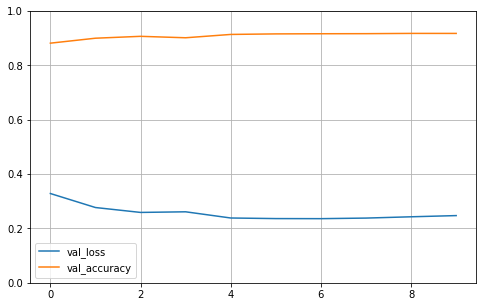

In [40]:
plotHistory(history_cnn)

# Data Visualization (including RFC, SVC, GBC model training)

**Accuracy**

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


In [42]:
model_RFC=RandomForestClassifier()
model_SVC=SVC()
model_GBC=GradientBoostingClassifier(max_features=15)

In [43]:
import time
def exec_time(start, end):
   diff_time = end - start
   return diff_time

In [44]:
start=time.time()
model_RFC.fit(train_images_std,train_labels_ar)
end=time.time()
RFC_time = exec_time(start,end)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [45]:
start=time.time()
model_SVC.fit(train_images_std,train_labels_ar)
end=time.time()
SVC_time = exec_time(start,end)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
start=time.time()
model_GBC.fit(train_images_std,train_labels_ar)
end=time.time()
GBC_time = exec_time(start,end)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
RFC_accuracy=accuracy_score(test_labels_ar,model_RFC.predict(test_images_std))

In [48]:
SVC_accuracy=accuracy_score(test_labels_ar,model_SVC.predict(test_images_std))

In [49]:
GBC_accuracy=accuracy_score(test_labels_ar,model_GBC.predict(test_images_std))

In [50]:
ANN_accuracy=test_acc

In [51]:
start=time.time()
model.fit(train_images, train_labels_ar, epochs=10,validation_data=(test_images,test_labels_ar))
end=time.time()
ANN_time = exec_time(start,end)

Epoch 1/10
   1/1257 [..............................] - ETA: 44s - loss: 0.1155 - accuracy: 1.0000

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1257/1257 [==============================] - 22s 18ms/step - loss: 0.2148 - accuracy: 0.9195 - val_loss: 0.3567 - val_accuracy: 0.8814
Epoch 2/10
1257/1257 [==============================] - 21s 17ms/step - loss: 0.2037 - accuracy: 0.9233 - val_loss: 0.3594 - val_accuracy: 0.8817
Epoch 3/10
1257/1257 [==============================] - 22s 17ms/step - loss: 0.1940 - accuracy: 0.9267 - val_loss: 0.4197 - val_accuracy: 0.8726
Epoch 4/10
1257/1257 [==============================] - 21s 17ms/step - loss: 0.1870 - accuracy: 0.9307 - val_loss: 0.3708 - val_accuracy: 0.8803
Epoch 5/10
1257/1257 [==============================] - 22s 17ms/step - loss: 0.1782 - accuracy: 0.9333 - val_loss: 0.3899 - val_accuracy: 0.8825
Epoch 6/10
1257/1257 [==============================] - 21s 17ms/step - loss: 0.1729 - accuracy: 0.9362 - val_loss: 0.3976 - val_accuracy: 0.8784
Epoch 7/10
1257/1257 [==============================] - 26s 21ms/step - loss: 0.1671 - accuracy: 0.9381 - val_loss: 0.4071 - val_accura

In [52]:
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(test_images,  test_labels_onehot, verbose=2)

619/619 - 7s - loss: 0.2473 - accuracy: 0.9175 - 7s/epoch - 11ms/step


In [53]:
CNN_accuracy=test_acc_cnn

In [54]:
start=time.time()
model_cnn.fit(train_images,train_labels_onehot, epochs=10, batch_size = BS,validation_data = (test_images, test_labels_onehot))
end=time.time()
CNN_time = exec_time(start,end)

Epoch 1/10
1257/1257 [==============================] - 39s 31ms/step - loss: 0.0997 - accuracy: 0.9652 - val_loss: 0.2484 - val_accuracy: 0.9163
Epoch 2/10
1257/1257 [==============================] - 45s 35ms/step - loss: 0.0890 - accuracy: 0.9680 - val_loss: 0.2459 - val_accuracy: 0.9199
Epoch 3/10
1257/1257 [==============================] - 37s 29ms/step - loss: 0.0799 - accuracy: 0.9727 - val_loss: 0.2582 - val_accuracy: 0.9196
Epoch 4/10
1257/1257 [==============================] - 35s 28ms/step - loss: 0.0704 - accuracy: 0.9766 - val_loss: 0.2606 - val_accuracy: 0.9187
Epoch 5/10
1257/1257 [==============================] - 37s 29ms/step - loss: 0.0636 - accuracy: 0.9790 - val_loss: 0.2693 - val_accuracy: 0.9172
Epoch 6/10
1257/1257 [==============================] - 37s 29ms/step - loss: 0.0561 - accuracy: 0.9815 - val_loss: 0.2828 - val_accuracy: 0.9168
Epoch 7/10
1257/1257 [==============================] - 39s 31ms/step - loss: 0.0500 - accuracy: 0.9846 - val_loss: 0.2836 -

RFC: 0.878
SVC: 0.884
GBC: 0.864
ANN: 0.885
CNN: 0.918


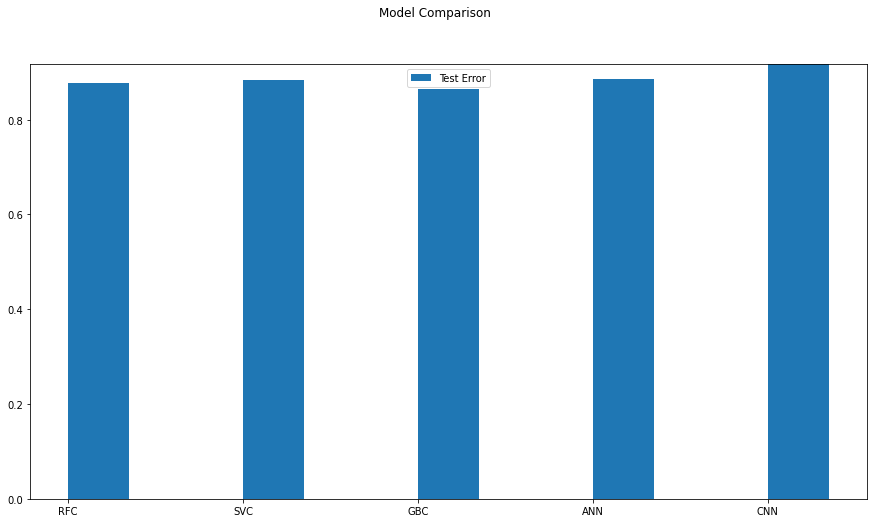

In [55]:
names=['RFC',
       'SVC',
       'GBC',
       'ANN',
       'CNN']

test=[]
test.append(RFC_accuracy)
test.append(SVC_accuracy)
test.append(GBC_accuracy)
test.append(ANN_accuracy)
test.append(CNN_accuracy)

fig = plt.figure()
ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.bar(ind + width/2, test, width=width, label='Test Error')
fig.set_size_inches(15,8)
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
plt.ylim(top = max(test))
for i in range(len(test)):
  p = "%s: %.3f" % (names[i], test[i])
  print(p)
plt.show()

**Time complexity**

RFC: 51.76s
SVC: 132.12s
GBC: 92.35s
ANN: 219.91s
CNN: 374.38s


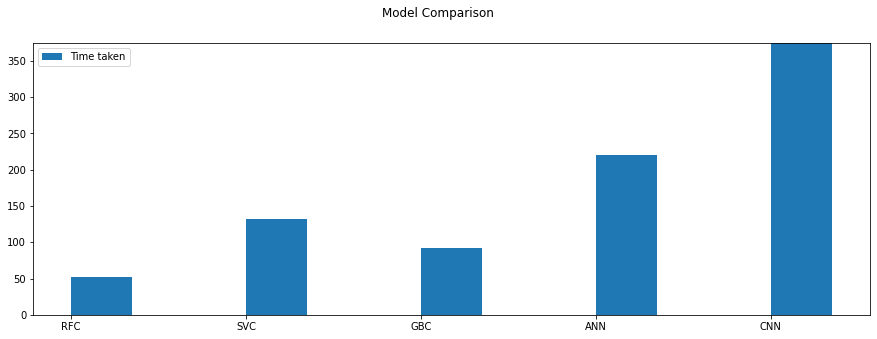

In [56]:
names=['RFC',
       'SVC',
       'GBC',
       'ANN',
       'CNN']

time=[]
time.append(RFC_time)
time.append(SVC_time)
time.append(GBC_time)
time.append(ANN_time)
time.append(CNN_time)

fig = plt.figure()
ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.bar(ind + width/2, time, width=width, label='Time taken')
fig.set_size_inches(15,5)
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
plt.ylim(top = max(time))
for i in range(len(time)):
  p = "%s: %.2f" % (names[i], (time[i]))
  print(p+"s")
plt.show()

# Model with data preprocessing

**Boundary analysis**

In [57]:
# data reshaping for further usage
train_images_2d_std = np.reshape(train_images_std, (train_images_std.shape[0],28,28))
test_images_2d_std = np.reshape(test_images_std, (test_images_std.shape[0],28,28))

train_images_2d_std.shape

(40200, 28, 28)

In [58]:
# Boundary deciding function
def diff_array(i, data):
  '''
  Input: index, tandardized dataset
  Output: 26*26 2d array based on difference
  '''
  # 1 2 3
  # 4 0 5
  # 6 7 8
  # difference of 0 = max(average(1,2,4), average(2,3,5), average(4,6,7), average(5,7,8))

  def diff(diff_r, diff_c):
    '''
    Input: index
    Output: the value of the index - the value of neighboring index
    '''
    return data[i, row, col] - data[i, row+diff_r, col+diff_c] 

  diff_ar = np.zeros((28,28))
  for row in range(1,27,1): # Note that I didn't consider the out most region (row 0, col 0, row 27, col 27)
    for col in range(1,27,1):
      l_u = (diff(-1,-1)+diff(-1,0)+diff(0,-1))/3 # the average difference for the top left corner
      l_d = (diff(0,-1)+diff(1,-1)+diff(1,0))/3 # the average difference for the down left corner
      r_u = (diff(-1,0)+diff(-1,1)+diff(0,1))/3 # the average difference for the top right corner
      r_d = (diff(0,1)+diff(1,0)+diff(1,1))/3 # the average difference for the down right corner
      max_diff = max(l_u, l_d, r_u, r_d) # record the highest average difference
      # diff_ar[row, col] = max_diff # for testing
      
      if max_diff > 0.5:  # the key threshold value (if the difference is above this value, consider it as a boundary)
        diff_ar[row,col] = 1 # Once it passes the threshold, we set this to 1
      
  return diff_ar

In [59]:
train_images_diff = np.asarray([diff_array(i, train_images_2d_std) for i in range(0, len(train_images_2d_std))])
test_images_diff = np.asarray([diff_array(i, test_images_2d_std) for i in range(0, len(test_images_2d_std))])

ANN

In [60]:
model_diff = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model_diff.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [61]:
model_diff.fit(train_images_diff,train_labels_ar, epochs=10, validation_data = (test_images_diff, test_labels_ar))

Epoch 1/10
1257/1257 [==============================] - 22s 17ms/step - loss: 0.5555 - accuracy: 0.8004 - val_loss: 0.4690 - val_accuracy: 0.8296
Epoch 2/10
1257/1257 [==============================] - 24s 19ms/step - loss: 0.3954 - accuracy: 0.8561 - val_loss: 0.4209 - val_accuracy: 0.8476
Epoch 3/10
1257/1257 [==============================] - 22s 17ms/step - loss: 0.3281 - accuracy: 0.8804 - val_loss: 0.4071 - val_accuracy: 0.8540
Epoch 4/10
1257/1257 [==============================] - 22s 18ms/step - loss: 0.2739 - accuracy: 0.9018 - val_loss: 0.4178 - val_accuracy: 0.8485
Epoch 5/10
1257/1257 [==============================] - 22s 17ms/step - loss: 0.2299 - accuracy: 0.9171 - val_loss: 0.4285 - val_accuracy: 0.8527
Epoch 6/10
1257/1257 [==============================] - 22s 17ms/step - loss: 0.1941 - accuracy: 0.9317 - val_loss: 0.4622 - val_accuracy: 0.8490
Epoch 7/10
1257/1257 [==============================] - 23s 18ms/step - loss: 0.1626 - accuracy: 0.9441 - val_loss: 0.4651 -

CNN

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


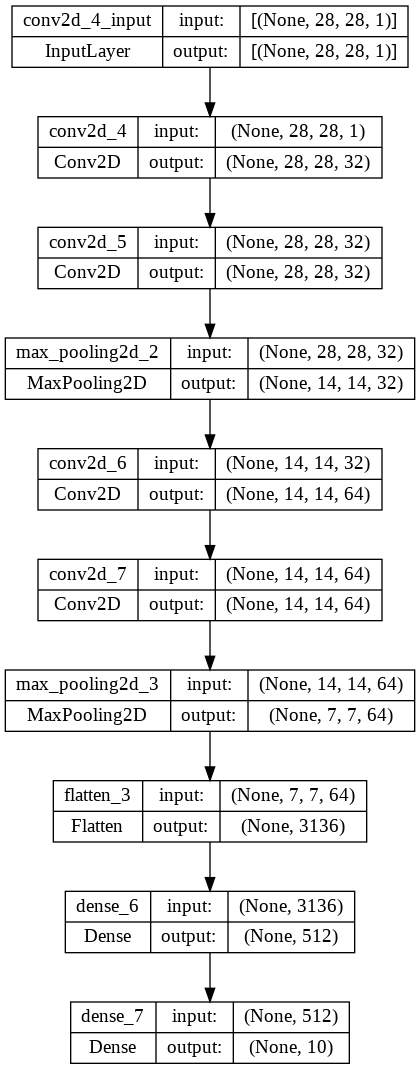

In [62]:
model_cnn_diff = tf.keras.models.Sequential()

## first CONV => RELU => CONV => RELU => POOL layer set ##
model_cnn_diff.add(tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation = 'relu', input_shape = (28,28,1)))
model_cnn_diff.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation = 'relu'))
model_cnn_diff.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


## second CONV => RELU => CONV => RELU => POOL layer set ##
model_cnn_diff.add(tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation = 'relu'))
model_cnn_diff.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation = 'relu'))
model_cnn_diff.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


## first (and only) set of FC => RELU layers ##
model_cnn_diff.add(tf.keras.layers.Flatten())
model_cnn_diff.add(tf.keras.layers.Dense(512, activation = 'relu'))
model_cnn_diff.add(tf.keras.layers.Dense(10, activation = 'softmax'))

# copy from https://pyimagesearch.com/2019/02/11/fashion-mnist-with-keras-and-deep-learning/

NUM_EPOCHS = 10
INIT_LR = 1e-2
BS = 32

opt = tf.keras.optimizers.SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / NUM_EPOCHS)
model_cnn_diff.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

tf.keras.utils.plot_model(model_cnn_diff, show_shapes = True)

In [63]:
history_cnn_diff=model_cnn_diff.fit(train_images,train_labels_onehot, epochs=10, batch_size = BS,validation_data = (test_images, test_labels_onehot))

Epoch 1/10
1257/1257 [==============================] - 38s 30ms/step - loss: 0.4968 - accuracy: 0.8228 - val_loss: 0.3209 - val_accuracy: 0.8852
Epoch 2/10
1257/1257 [==============================] - 37s 30ms/step - loss: 0.2867 - accuracy: 0.8946 - val_loss: 0.2865 - val_accuracy: 0.8975
Epoch 3/10
1257/1257 [==============================] - 35s 27ms/step - loss: 0.2417 - accuracy: 0.9117 - val_loss: 0.2607 - val_accuracy: 0.9051
Epoch 4/10
1257/1257 [==============================] - 34s 27ms/step - loss: 0.2109 - accuracy: 0.9230 - val_loss: 0.2469 - val_accuracy: 0.9105
Epoch 5/10
1257/1257 [==============================] - 33s 26ms/step - loss: 0.1915 - accuracy: 0.9304 - val_loss: 0.2470 - val_accuracy: 0.9101
Epoch 6/10
1257/1257 [==============================] - 37s 30ms/step - loss: 0.1731 - accuracy: 0.9374 - val_loss: 0.2324 - val_accuracy: 0.9156
Epoch 7/10
1257/1257 [==============================] - 37s 29ms/step - loss: 0.1584 - accuracy: 0.9421 - val_loss: 0.2306 -

**Principal Component Analysis**

In [64]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10) # do principle component analysis. Choose the best 10 variables that can explain the most variations.
train_images_pca = pca.fit(train_images_std).transform(train_images_std)

In [65]:
pca.explained_variance_ratio_

array([0.29001182, 0.17735104, 0.06021262, 0.04979453, 0.03874341,
       0.0346694 , 0.02334097, 0.01903877, 0.01341494, 0.01300965])

In [66]:
train_images_pca = np.matmul(train_images_std, pca.components_.T)
test_images_pca = np.matmul(test_images_std, pca.components_.T)

In [67]:
model_PCA = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape = (10,)),
    tf.keras.layers.Dense(10)
])

model_PCA.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [68]:
model_PCA.fit(train_images_pca,train_labels_ar, epochs=10, validation_data = (test_images_pca, test_labels_ar))

Epoch 1/10
  11/1257 [..............................] - ETA: 15s - loss: 4.6156 - accuracy: 0.0341

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1257/1257 [==============================] - 21s 16ms/step - loss: 0.7101 - accuracy: 0.7422 - val_loss: 0.5616 - val_accuracy: 0.7874
Epoch 2/10
1257/1257 [==============================] - 22s 18ms/step - loss: 0.5495 - accuracy: 0.7935 - val_loss: 0.5473 - val_accuracy: 0.7856
Epoch 3/10
1257/1257 [==============================] - 21s 17ms/step - loss: 0.5235 - accuracy: 0.8017 - val_loss: 0.5171 - val_accuracy: 0.8020
Epoch 4/10
1257/1257 [==============================] - 22s 17ms/step - loss: 0.5103 - accuracy: 0.8074 - val_loss: 0.5114 - val_accuracy: 0.8069
Epoch 5/10
1257/1257 [==============================] - 21s 17ms/step - loss: 0.4983 - accuracy: 0.8132 - val_loss: 0.5116 - val_accuracy: 0.8047
Epoch 6/10
1257/1257 [==============================] - 21s 17ms/step - loss: 0.4909 - accuracy: 0.8172 - val_loss: 0.5188 - val_accuracy: 0.8071
Epoch 7/10
1257/1257 [==============================] - 22s 18ms/step - loss: 0.4840 - accuracy: 0.8174 - val_loss: 0.5074 - val_accura

# **Conclusion**

In conclusion, we can assert that the assorted ML models, ANN and CNN models provide relatively similar results. However, The increased accuracy by ANN and CNN comes at a cost in time complexity.

With data pre-processing, we can cut the time cost. Especially, when boundary analysis is used with CNN, it drastically reduces the time cost with minimal effect on the accuracy